https://spacy.pythonhumanities.com/01_01_install_and_containers.html

In [ ]:
!pip install spacy # this is open source library for advanced natural language processing in python

In [ ]:
!python -m spacy download en_core_web_sm

In [3]:
import spacy

In [4]:
nlp = spacy.load("en_core_web_sm") # Load the small English model

### Containers in spaCy 
It is object that contains a large quantity of data about a given text. To analyze texts with spaCy, we create different container objects. Among many containers we are focusing main three which is relevant here: Doc, Span and Token (others are DocBin, Example, Language, Lexeme, SpanGroup)

#### Doc

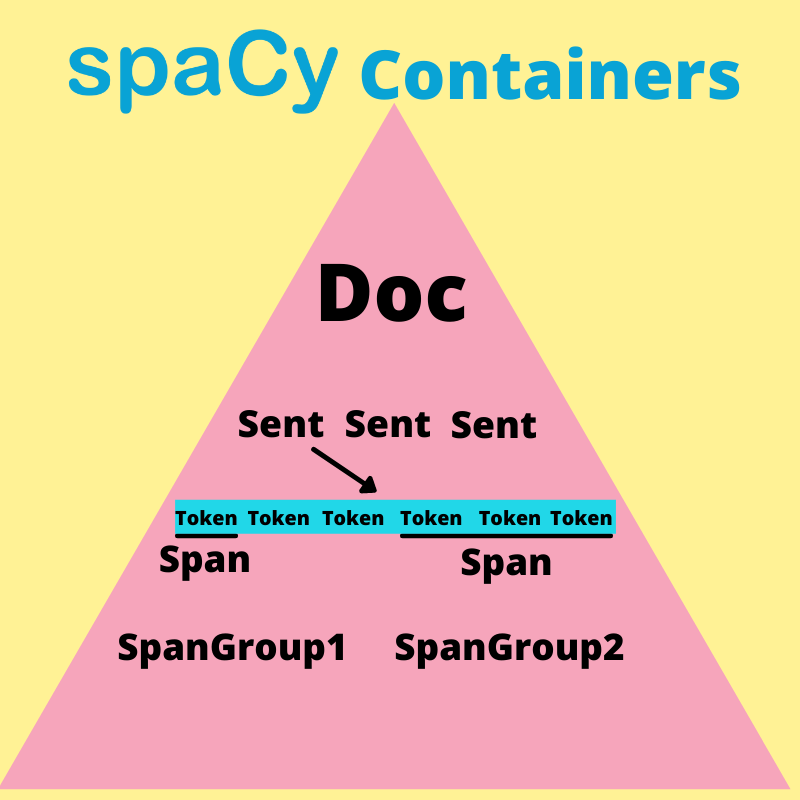

The above pyramid shape, where Doc object contains bunch of objects which contains attributes like sentences and meta data about the text. When you iterate your each item (index) in your doc objects, you can get individual tokens. Tokens are going to be words and punctuation marks. Your text are just convert into many tokens. Like your words, comma, punctuations etc. all are become token. 

The next object we are focusing here is called Span, which is sequence of index of multiple tokens. We will understand more practically.

In [5]:
with open("wiki_us.txt","r") as file:
    text = file.read()

In [6]:
print(text)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.

Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies est

In [7]:
doc = nlp(text)

In [8]:
print(doc)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.

Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies est

The above two outputs looks exactly same, then what is the basically difference between them. Let's print the length of both text. 

In [9]:
print(len(text))
print(len(doc))

3525
652


So, the length looks very different here. Let's observe this more by taking 10 samples for each of them.

In [10]:
for token in text[0:10]:
    print(token)

T
h
e
 
U
n
i
t
e
d


In [11]:
for token in doc[0:10]:
    print(token)

The
United
States
of
America
(
U.S.A.
or
USA
)


Hmmmm... something going on here. The first one simply treat as text but the second one looks some groups of words which is basically **TOKEN** 

We might thinking, this last output I can achieve simply using split function. I may not need spaCy library for that but let's see little demonstration here.

In [12]:
for token in text.split()[:10]:
    print(token)

The
United
States
of
America
(U.S.A.
or
USA),
commonly
known


You may see in one glance that both looks same until you see more closely after America. One is with bracket and U.S.A on same line which is basically treats as one word but in spaCy output, individual bracket identified as separate token and U.S.A as separate token.

### Sentence Boundary Detection

In NLP, sentence boundary detection, or SBD, is the identification of sentences in a text. Again, this may seem fairly easy to do with rules. One could use split(“.”), but in English we use the period to also denote abbreviation. You could, again, write rules to look for periods not proceeded by a lowercase word, but again, I ask the question, “why bother?”. We can use spaCy and in seconds have all sentences fully separated through SBD.

To access the sentences in the Doc container, we can use the attribute sents, like so:

In [14]:
for sent in doc.sents: # use doc.sents[0] to get the first sentence but first convert it to list like `list(doc.sents)[0]`
    print (sent)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.
It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j]
At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d]
The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22]
With a population of more than 331 million people, it is the third most populous country in the world.
The national capital is Washington, D.C., and the most populous city is New York.


Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century.
The United States emerged from the thirteen British colonies es

### Token Attributes


Among many attributes we are going to use following:

.text, .head, .left_edge, .right_edge, .ent_type_, .iob_, .lemma_, .morph, .pos_, .dep_, .lang_

In [15]:
sentence = list(doc.sents)[0]

In [ ]:
token2 = sentence[2] # get the third token in the sentence which is States from "The United States of America..."
print (token2)

States


In [30]:
print(token2.text) #which is basically as string 'States', try to see without print statement
print(token2.head)
print(token2.left_edge)
print(token2.right_edge)
print(token2.ent_type)
print(token2.ent_type_) # Note the absence of the _ at the end of the attribute. This will return an integer that corresponds to an entity type, where as _ will give you the string equivalent., as in below.
print(token2.ent_iob_) #IOB is a method of annotating a text. In this case, we see “I” because states is inside an entity, that is to say that it is part of the United States of America. If it was the first token in the entity, it would be “B” for beginning. If it was outside of an entity, it would be “O” for outside.
print(token2.lemma_) #base form of token
print(token2.morph)
print(sentence[12])
print(sentence[12].morph) #morphological analysis of the token
print(sentence[12].pos_) #part of speech of the token
print(sentence[12].dep_) #Syntactic dependency relation
print(sentence[12].lang_) #lang of the token

States
is
The
America
384
GPE
I
States
Number=Sing
known
Aspect=Perf|Tense=Past|VerbForm=Part
VERB
acl
en
